In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data Sets/heart_disease.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,459.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,0.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,229.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,459.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,689.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,919.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [7]:
df.shape

(920, 15)

In [8]:
df.drop(columns=['id'],axis=1,inplace=True)

In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and print value counts
for column in categorical_columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts())
    print("-" * 30)

Value Counts for 'sex':
sex
Male      726
Female    194
Name: count, dtype: int64
------------------------------
Value Counts for 'dataset':
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
------------------------------
Value Counts for 'cp':
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
------------------------------
Value Counts for 'fbs':
fbs
False    692
True     138
Name: count, dtype: int64
------------------------------
Value Counts for 'restecg':
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
------------------------------
Value Counts for 'exang':
exang
False    528
True     337
Name: count, dtype: int64
------------------------------
Value Counts for 'slope':
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
-----------------------------

## Handling Missing values

In [10]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())

In [11]:
df['chol']=df['chol'].fillna(df['chol'].mean())

In [12]:
df.dropna(subset=['restecg'],inplace=True)

In [13]:
df['fbs']=df['fbs'].fillna('Missing')

In [14]:
df['thalch']=df['thalch'].fillna(df['thalch'].mean())

In [15]:
df['exang']=df['exang'].fillna('Missing')

In [16]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mode())

In [17]:
df['slope']=df['slope'].fillna('Missing')

In [18]:
df['ca']=df['ca'].fillna('0.0')

In [19]:
df['thal']=df['thal'].fillna('No')

In [20]:
df['oldpeak']=df['oldpeak'].fillna('0.0')

In [21]:
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## Check and Handling the Outliers

In [22]:
numeric_feature=df.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", numeric_feature.shape[0])
print("Integer feature names: ", numeric_feature)

Total number of integer feature :  4
Integer feature names:  Index(['age', 'trestbps', 'chol', 'thalch'], dtype='object')


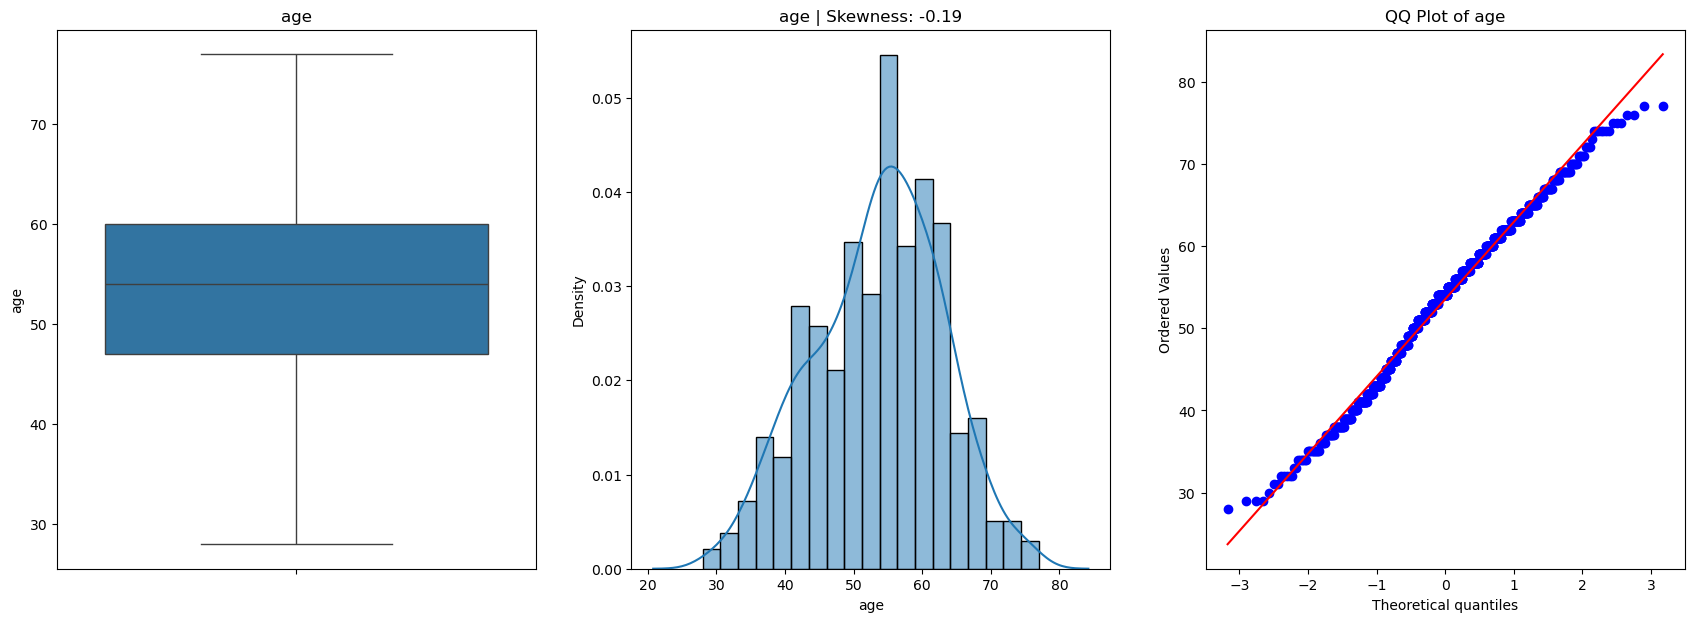

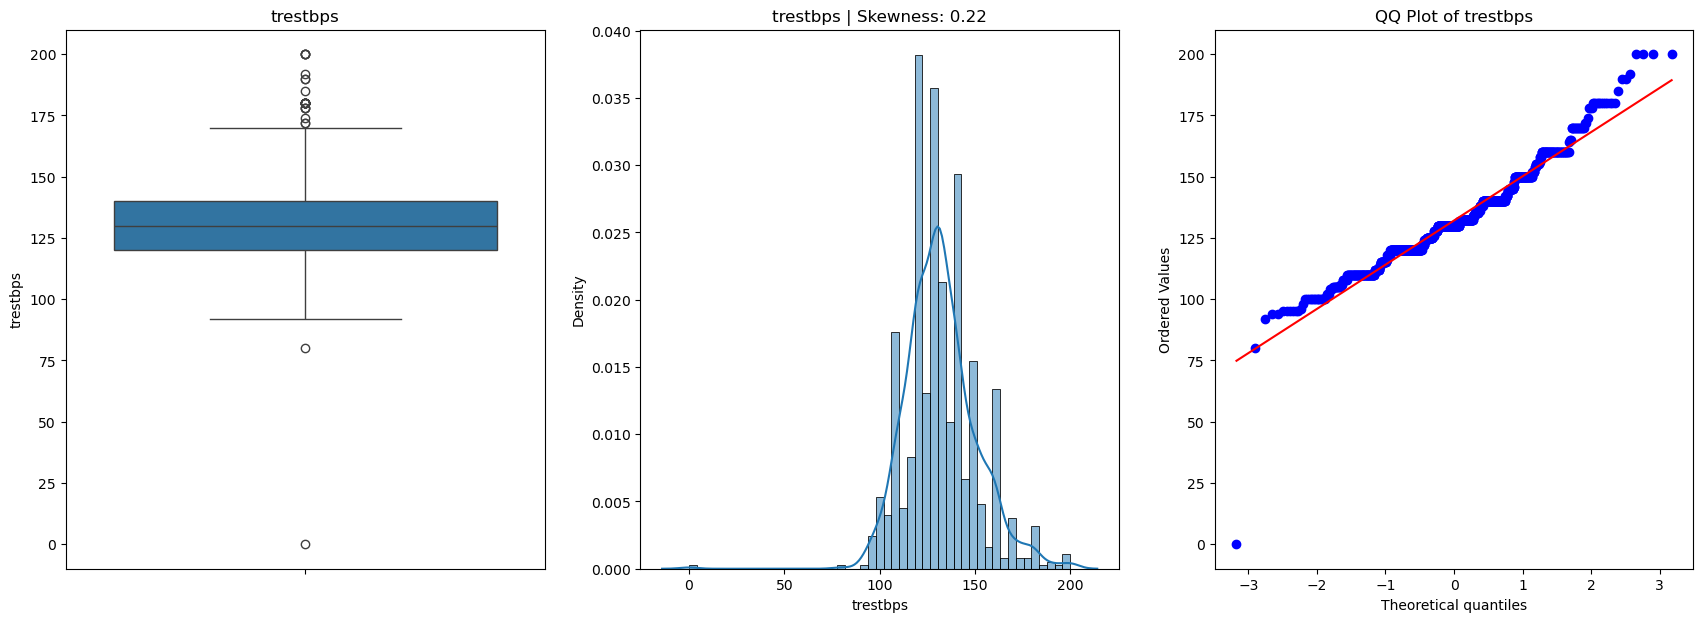

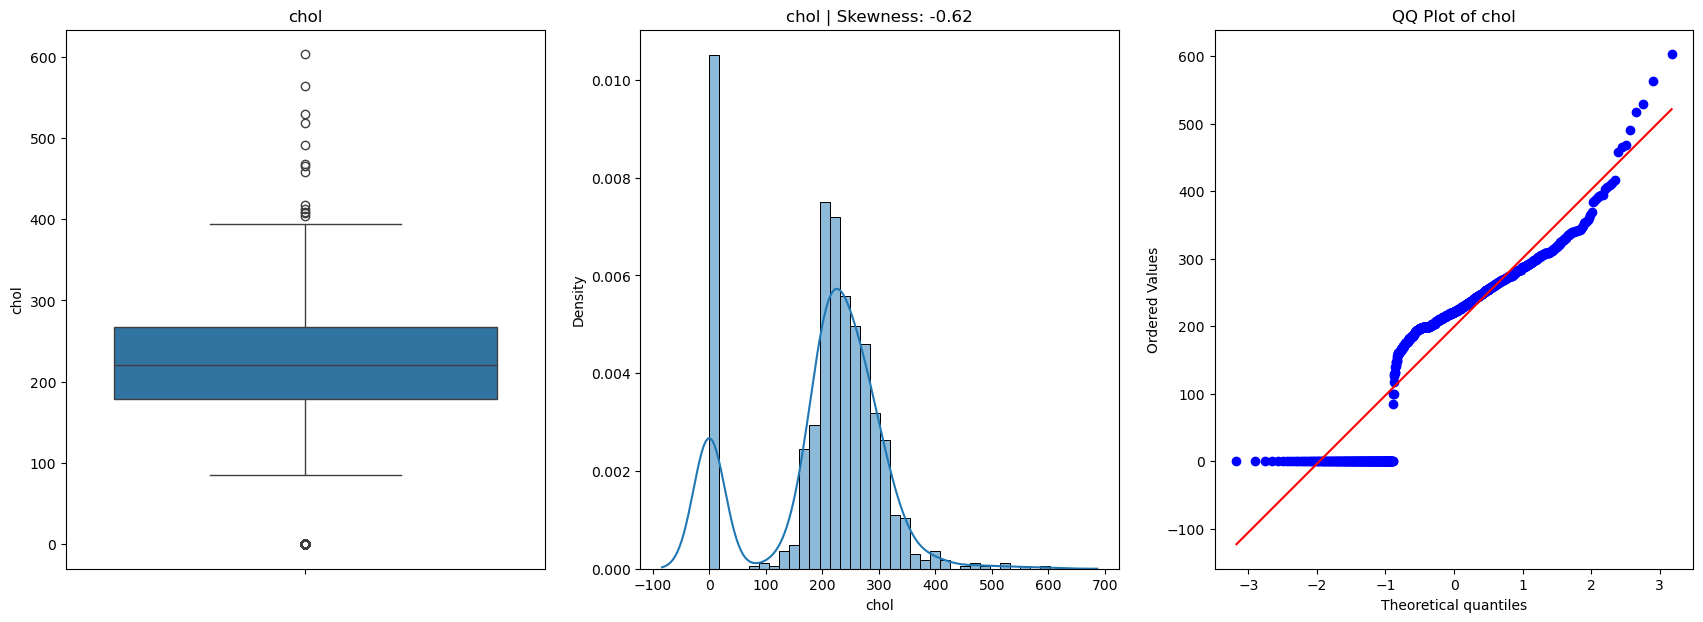

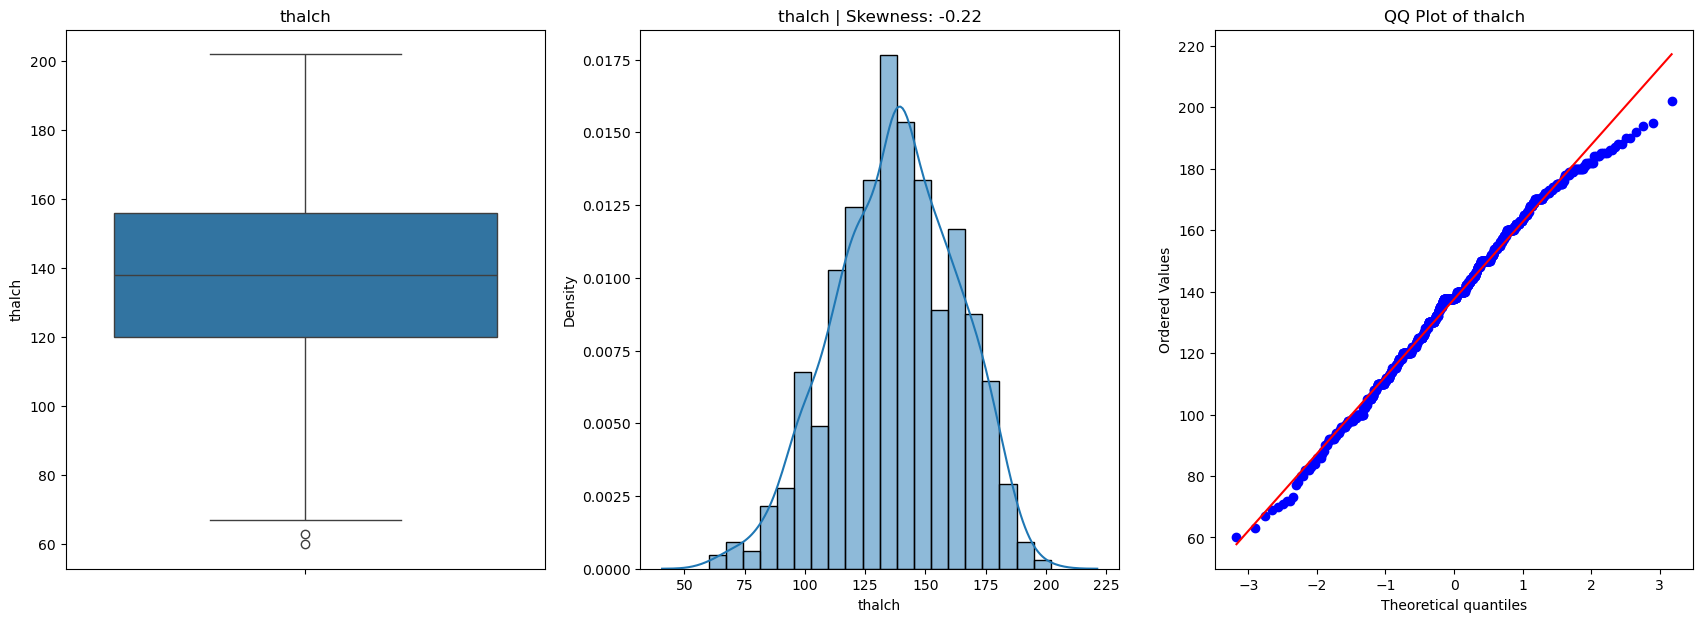

Columns with outliers: ['trestbps' 'chol' 'thalch']


In [23]:
from scipy import stats
outlier_cols = []

for col in numeric_feature:
    n = df[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(df[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

plt.show()

In [24]:
X_cap = df.copy()
for col in outlier_cols:
       percentile25 = df[col].quantile(0.25)
       percentile75 = df[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       X_cap[col] = np.where(
         X_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  X_cap[col] < lower_limit,
                  lower_limit,
                  X_cap[col]
                  )
       )

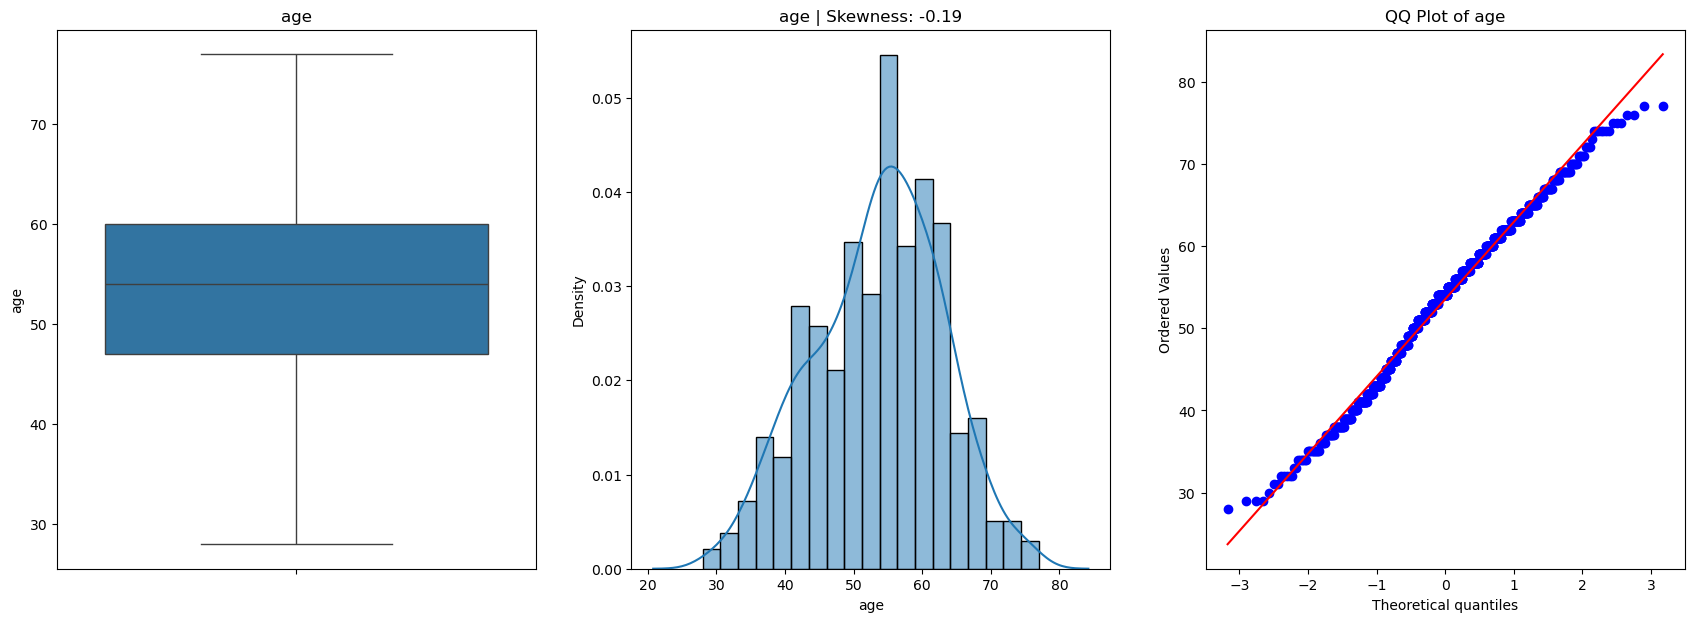

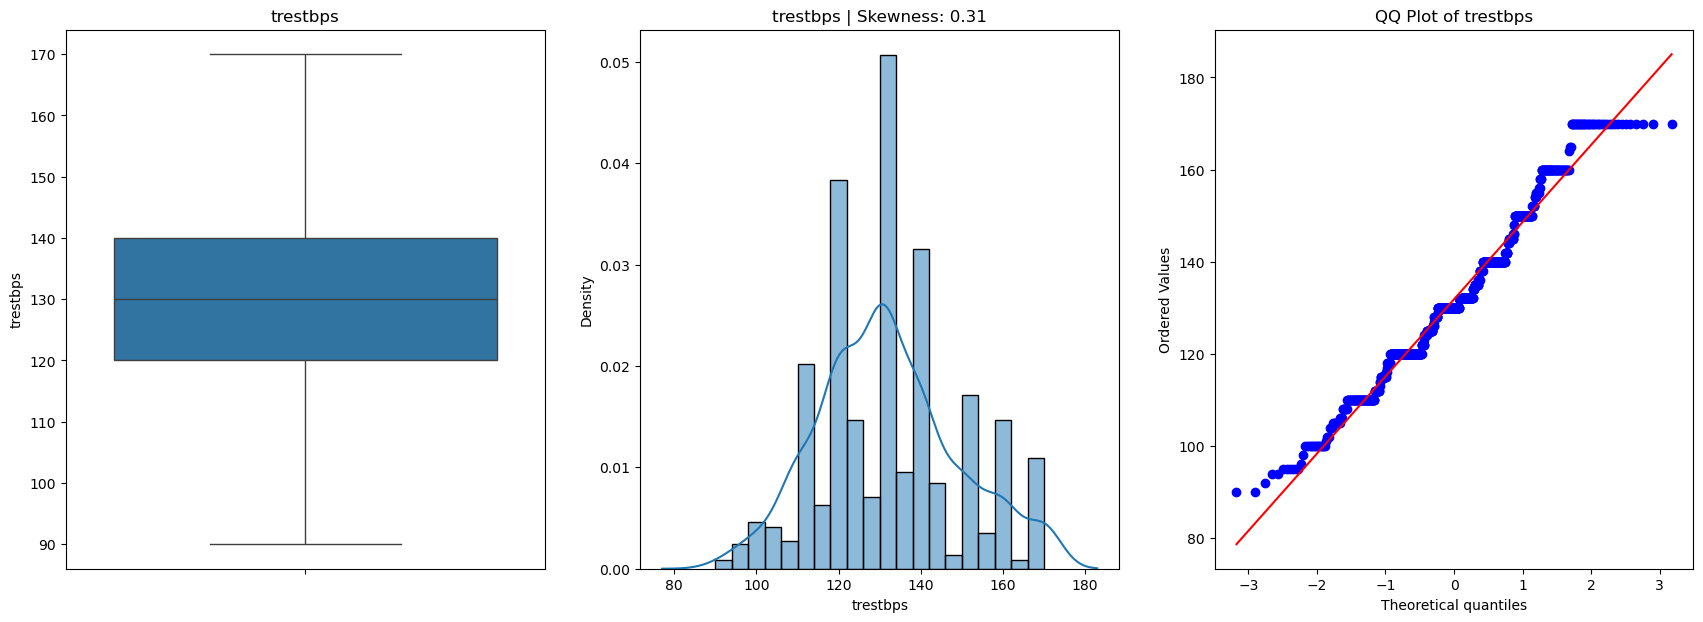

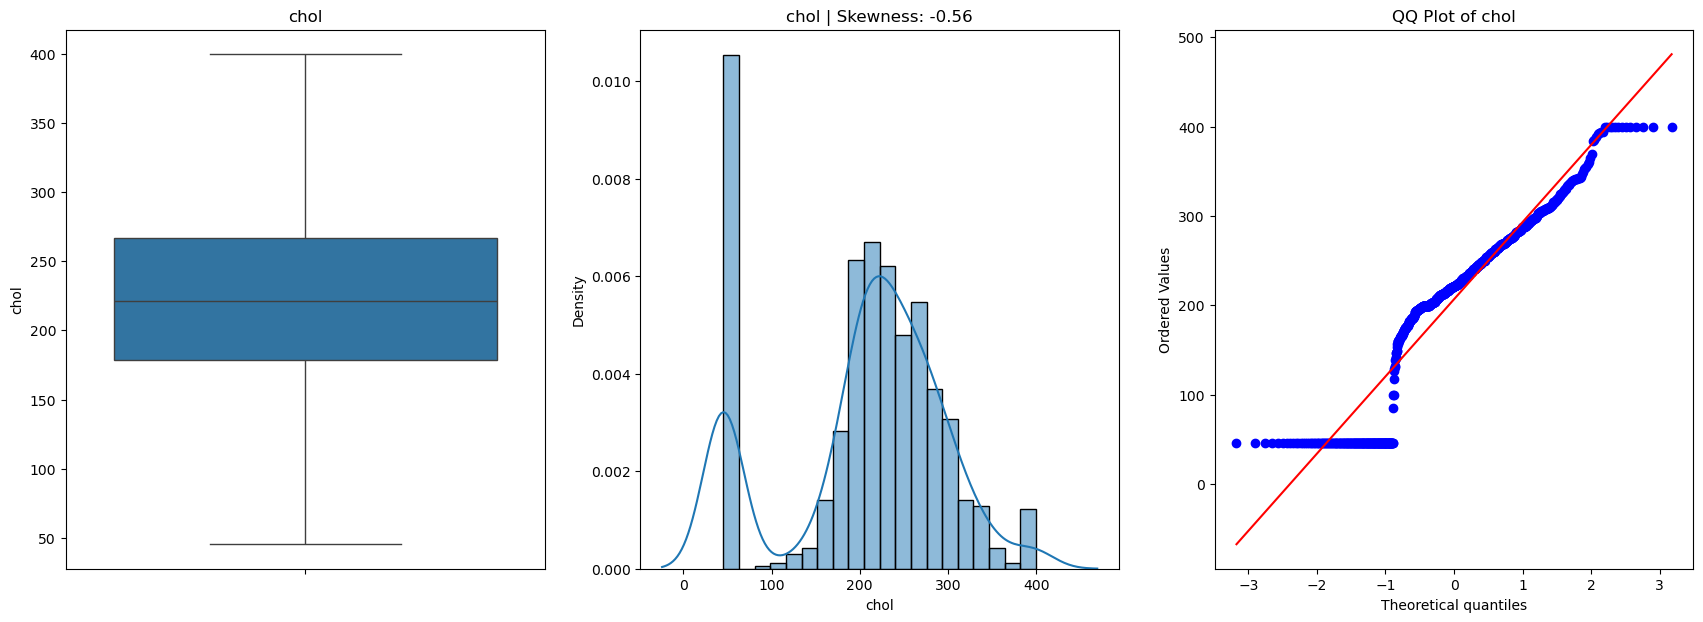

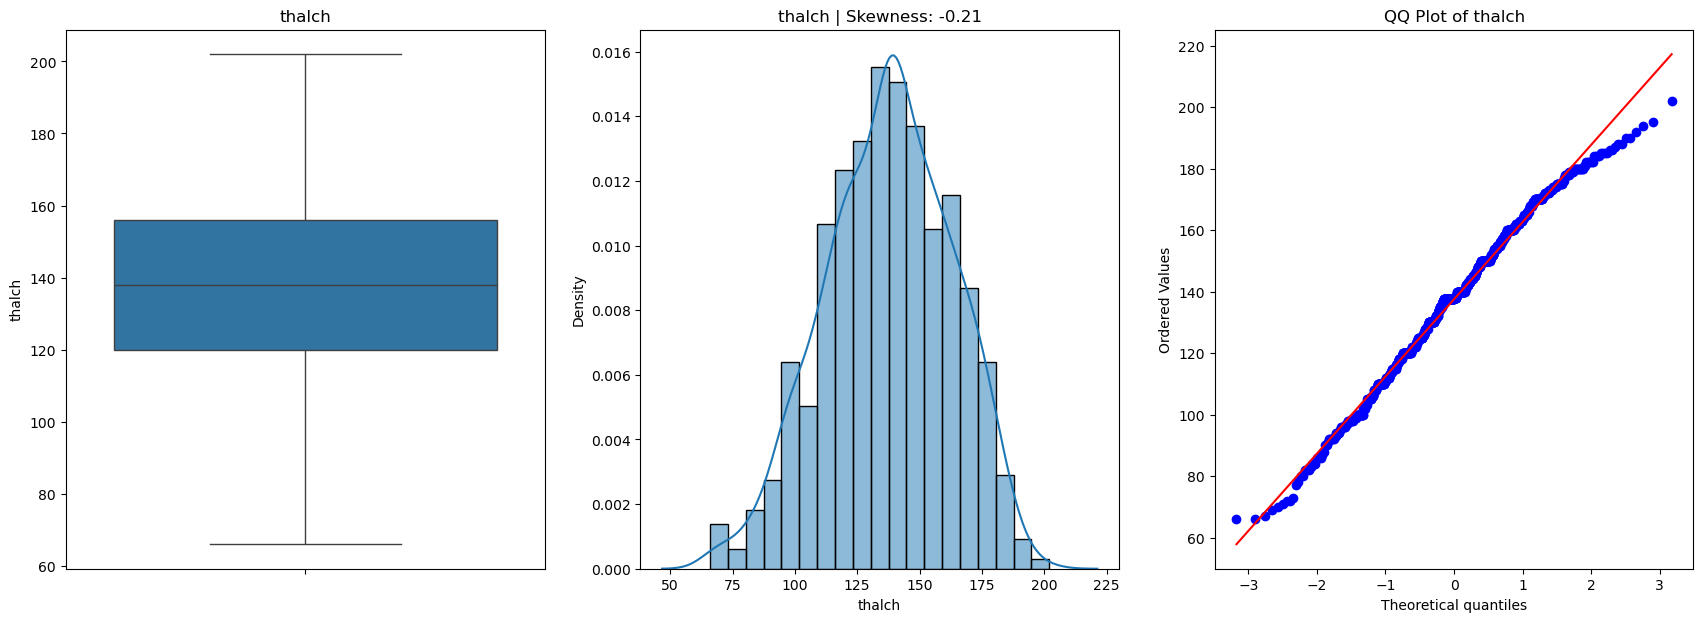

Columns with outliers: []


In [25]:
outlier_cols = []

for col in numeric_feature:
    n = X_cap[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(X_cap[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(X_cap[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(X_cap[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(X_cap[col], 25)
    q3 = np.percentile(X_cap[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (X_cap[col] < lower_bound) | (X_cap[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

   # print(f"Column: {col} | Skewness: {n}")

plt.show()

## Applying OneHot Encoding

## Check and Handle the Skewness Distribution

Skewness of features:
 age        -0.193393
trestbps    0.219422
chol       -0.623735
thalch     -0.215510
dtype: float64


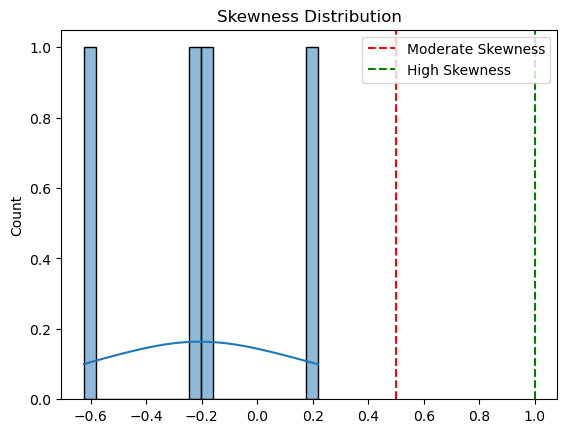

In [28]:
# from scipy.stats import skew
# skewness = df_encoded[numeric_feature].apply(skew)
# print("Skewness of features:\n", skewness)

# X = df_encoded.drop(columns=['dataset_Cleveland','dataset_Hungary','dataset_Switzerland','dataset_VA Long Beach'])

# # Plot histogram of skewness
# sns.histplot(skewness, kde=True, bins=20)
# plt.axvline(x=0.5, color='r', linestyle='--', label='Moderate Skewness')
# plt.axvline(x=1, color='g', linestyle='--', label='High Skewness')
# plt.legend()
# plt.title("Skewness Distribution")
# plt.show()

In [29]:
# # Apply Log Transformation for highly skewed features
# df_transformed = df_encoded.copy()
# for col in numeric_feature:
#     if skewness[col] > 0.5:
#         df_transformed[col] = np.log1p(df_encoded[col])  # log1p handles zero values

## Applying K-Means

In [30]:
from sklearn.cluster import KMeans
# Apply K-Means clustering
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [31]:
#Assign cluster labels to the original dataframe
df_encoded['Cluster'] = kmeans.labels_

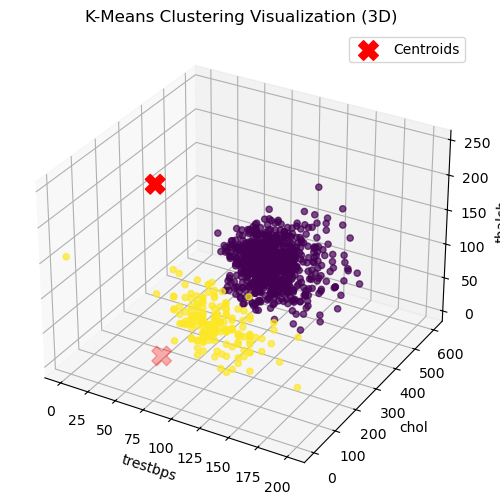

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clustered points
ax.scatter(df_encoded.iloc[:, 1], df_encoded.iloc[:, 2], df_encoded.iloc[:, 3], c=df_encoded['Cluster'], cmap='viridis', alpha=0.7)

# Scatter plot for centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=200, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_title('K-Means Clustering Visualization (3D)')
ax.set_xlabel(df_encoded.columns[1])
ax.set_ylabel(df_encoded.columns[2])
ax.set_zlabel(df_encoded.columns[3])
ax.legend()
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

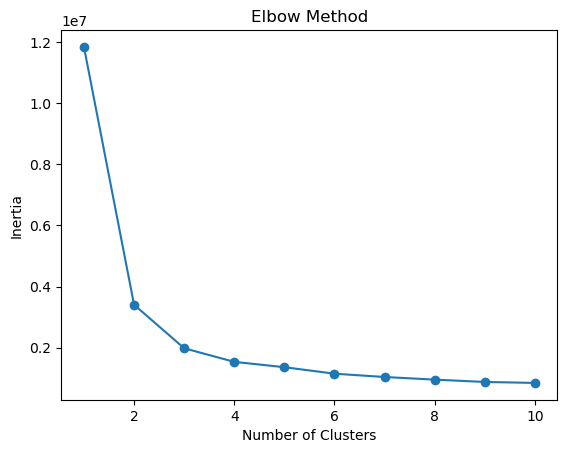

In [33]:
inertia = []
K_range = range(1, 11)  # Checking for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [34]:
# Display cluster-wise analysis (excluding non-numeric columns)
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
cluster_summary = df_encoded[numeric_columns].groupby('Cluster').mean()

print("Cluster Summary:")
cluster_summary

Cluster Summary:


,age,trestbps,chol,thalch,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,...,slope_flat,slope_upsloping,thal_No,thal_fixed defect,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
Cluster,,,,,,,,,,,,,,,,,,,,,
0,52.893674,132.756515,245.629758,140.929714,0.246299,0.753701,0.493943,0.223419,0.228802,0.053836,...,0.358008,0.220727,0.526245,0.047106,0.236878,0.189771,0.409152,0.388964,0.000000,0.201884
1,56.234286,129.535550,2.297143,123.087337,0.062857,0.937143,0.731429,0.045714,0.194286,0.028571,...,0.451429,0.217143,0.531429,0.062857,0.114286,0.291429,0.000000,0.017143,0.697143,0.285714


In [35]:
df_encoded.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,slope_upsloping,thal_No,thal_fixed defect,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,Cluster
0,63,145.0,233.0,150.0,2.3,0.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,67,160.0,286.0,108.0,1.5,3.0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
2,67,120.0,229.0,129.0,2.6,2.0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,37,130.0,250.0,187.0,3.5,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,41,130.0,204.0,172.0,1.4,0.0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0


In [36]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(X, df_encoded['Cluster'])

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.7029
